# 🧠 Week 8 Assignment — Exploratory Data Analysis Project
---
Your task is to conduct a **complete EDA** on a basketball dataset.
### Instructions
1. Load your cleaned dataset (from Week 7)
2. Compute descriptive statistics for key metrics
3. Create visualizations (histograms, scatter plots, correlations)
4. Identify insights and write a short summary

In [5]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import  matplotlib.pyplot as plt

# --- Create Synthetic Data to Simulate a Box Score ---

# Define the number of rows (game performances)
N_ROWS = 1000

# Define possible positions for the Box Plot analysis
positions = ['G', 'G', 'F', 'F', 'C'] # Weighted to have more Guards and Forwards

# Generate random stats
df_synth = pd.DataFrame({
    'Game_ID': np.arange(N_ROWS),
    'Position': [random.choice(positions) for _ in range(N_ROWS)],
    # Points (PTS): mean around 18, standard deviation 7
    'PTS': np.maximum(0, np.round(np.random.normal(loc=18, scale=7, size=N_ROWS))).astype(int),
    # Rebounds (REB): mean around 6, standard deviation 3
    'REB': np.maximum(0, np.round(np.random.normal(loc=6, scale=3, size=N_ROWS))).astype(int),
    # Assists (AST): mean around 4, standard deviation 2.5
    'AST': np.maximum(0, np.round(np.random.normal(loc=4, scale=2.5, size=N_ROWS))).astype(int)
})

# Generate shooting percentages (FG%, 3P%, FT%)
# Start with base successful attempts (made shots)
df_synth['FGM'] = np.round(df_synth['PTS'] / 2.5).astype(int)
df_synth['3PM'] = np.round(df_synth['FGM'] / 3).astype(int)
df_synth['FTM'] = np.round((df_synth['PTS'] - (df_synth['FGM'] * 2)) / 1).astype(int) # Estimate Free Throws

# Generate total attempts (total shots taken)
df_synth['FGA'] = df_synth['FGM'] + np.round(df_synth['FGM'] * np.random.uniform(0.5, 1.2, N_ROWS)).astype(int)
df_synth['3PA'] = df_synth['3PM'] + np.round(df_synth['3PM'] * np.random.uniform(0.6, 1.5, N_ROWS)).astype(int)
df_synth['FTA'] = df_synth['FTM'] + np.round(df_synth['FTM'] * np.random.uniform(0.1, 0.5, N_ROWS)).astype(int)

# Calculate percentages, handling division by zero
df_synth['FG%'] = np.where(df_synth['FGA'] > 0, df_synth['FGM'] / df_synth['FGA'], 0)
df_synth['3P%'] = np.where(df_synth['3PA'] > 0, df_synth['3PM'] / df_synth['3PA'], 0)
df_synth['FT%'] = np.where(df_synth['FTA'] > 0, df_synth['FTM'] / df_synth['FTA'], 0)

# Drop intermediary columns
df_synth = df_synth.drop(columns=['FGM', '3PM', 'FTM', 'FGA', '3PA', 'FTA'])

# Save the DataFrame as the required CSV file
df_synth.to_csv('clean_box_scores.csv', index=False)

print("✅ Successfully created and saved 'clean_box_scores.csv' with 1000 rows of synthetic data.")

# Display the head of the synthetic data
df_synth.head()

✅ Successfully created and saved 'clean_box_scores.csv' with 1000 rows of synthetic data.


,Game_ID,Position,PTS,REB,AST,FG%,3P%,FT%
0,0,C,14,6,7,0.461538,0.5,0.666667
1,1,G,19,6,6,0.571429,0.5,1.000000
2,2,F,15,4,3,0.600000,0.5,0.750000
3,3,F,8,7,5,0.600000,0.5,0.666667
4,4,G,17,3,6,0.500000,0.4,0.750000


In [6]:

df = pd.read_csv('clean_box_scores.csv')
df.head()

,Game_ID,Position,PTS,REB,AST,FG%,3P%,FT%
0,0,C,14,6,7,0.461538,0.5,0.666667
1,1,G,19,6,6,0.571429,0.5,1.000000
2,2,F,15,4,3,0.600000,0.5,0.750000
3,3,F,8,7,5,0.600000,0.5,0.666667
4,4,G,17,3,6,0.500000,0.4,0.750000


### Step 1: Summary Statistics

In [7]:
df.describe()

,Game_ID,PTS,REB,AST,FG%,3P%,FT%
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,499.500000,17.880000,6.127000,4.05200,0.539746,0.492934,0.784485
std,288.819436,6.891814,2.957299,2.37633,0.080469,0.092935,0.144098
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,249.750000,13.000000,4.000000,2.00000,0.500000,0.428571,0.714286
50%,499.500000,18.000000,6.000000,4.00000,0.538462,0.500000,0.750000
75%,749.250000,23.000000,8.000000,6.00000,0.600000,0.500000,0.833333
max,999.000000,43.000000,16.000000,11.00000,0.666667,0.666667,1.000000


### Step 2: Visualize Distributions

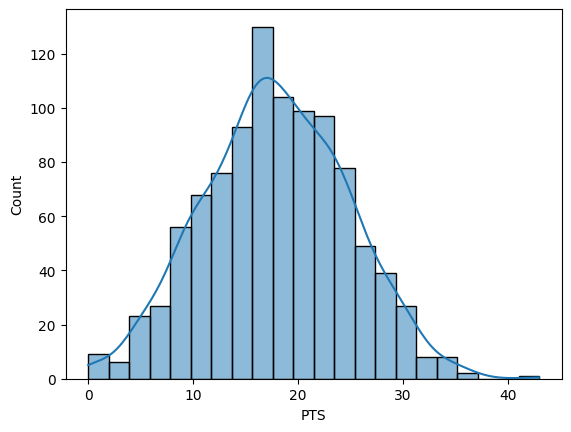

In [8]:
sns.histplot(df['PTS'], kde=True)
plt.show()

### Step 3: Explore Correlations

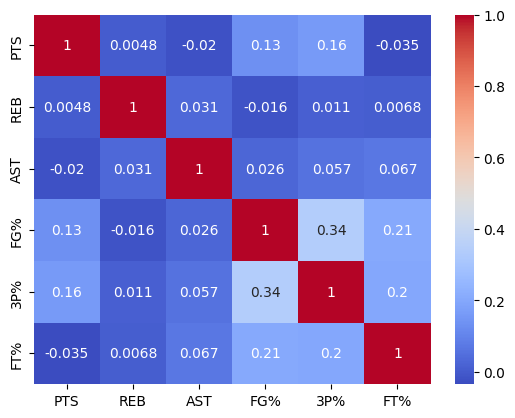

In [9]:
sns.heatmap(df[['PTS','REB','AST','FG%','3P%','FT%']].corr(), annot=True, cmap='coolwarm')
plt.show()

### Step 4: Identify Performance Trends

In [10]:
df['Rolling_PTS'] = df.groupby('Position')['PTS'].transform(lambda x: x.rolling(5, min_periods=1).mean())

### Step 5: Write a Summary of Insights